# AutoGrad PyTorch Simple Linear Regression Example

* Reference
  1. https://blog.kovalevskyi.com/autograd-pytorch-simple-linear-regression-example-a90f68f4b5d4
  2. https://colab.research.google.com/drive/1jP29Axag9CgFh2lw6uix6ndsnWdRR0SK?usp=sharing

In [1]:
import numpy as np

def f(x):
  return x * 2 + 1

rng = np.random.default_rng(2021)
X = rng.random(1000)
Y = [f(x) for x in X]

In [2]:
import torch

torch.manual_seed(2021)

w = torch.rand(1, requires_grad=True, dtype=torch.float64)
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

def model(X):
  return X * w + b

In [3]:
def loss(y_predict, y_actual):
  return torch.pow(y_predict - y_actual, 2)

/home/administrator/anaconda3/lib/python3.7/site-packages/secretstorage/__init__.py:10: UserWarning: jeepney.integrate.blocking is deprecated: please use jeepney.io.blocking instead.
  from jeepney.integrate.blocking import DBusConnection, connect_and_authenticate
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
x: 0.7569478279346672, actual y: 2.5138956558693346, predicted y: 2.5138956558693346, loss: 2.3731455306473843
w: 0.043512725296219856, b: 0.043512725296219856
gradient for w is: tensor([-2.3322], dtype=torch.float64), gradient for b is: tensor([-3.0810], dtype=torch.float64)
updated w: 0.04584488414881058, updated b: 0.04584488414881058


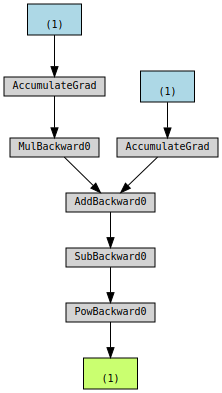

In [4]:
%pip install torchviz==0.0.2

from torchviz import make_dot
# one iteration
x = X[0]
y = Y[0]
y_predicted = model(x)
loss_tensor = loss(y_predicted, y)
loss_value = loss_tensor.data[0]
print(f"x: {x}, actual y: {y}, predicted y: {y}, loss: {loss_value}")
print(f"w: {w.data[0]}, b: {w.data[0]}")
loss_tensor.backward()
print(f"gradient for w is: {w.grad}, gradient for b is: {b.grad}")
with torch.no_grad():
  w -= w.grad * 1e-3
  b -= b.grad * 1e-3
print(f"updated w: {w.data[0]}, updated b: {w.data[0]}")
make_dot(loss_tensor)

In [5]:
epoch = 100

for e in range(epoch):
  for i in range(len(X)):
    x, y = torch.tensor(X[i]), torch.tensor(Y[i])
    y_predict = model(x)
    loss_tensor = loss(y_predict, y)
    loss_tensor.backward()
    loss_value = loss_tensor.data[0]
    with torch.no_grad():
      w -= w.grad * 1e-3
      b -= b.grad * 1e-3
      w.grad.zero_()
      b.grad.zero_()
  if e %10 == 9:
      print(f'epoch {e}: loss = {loss_value}')

epoch 9: loss = 0.018797459168968304
epoch 19: loss = 0.0013708335252524328
epoch 29: loss = 9.997013621937533e-05
epoch 39: loss = 7.290475430911308e-06
epoch 49: loss = 5.31669096574477e-07
epoch 59: loss = 3.877278387826513e-08
epoch 69: loss = 2.82756470047054e-09
epoch 79: loss = 2.0620449028025036e-10
epoch 89: loss = 1.503777854749517e-11
epoch 99: loss = 1.0966530538739394e-12
